In [4]:
#importing require python packages and classes
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import BernoulliRBM #loading Restricted Boltzmann Machines (RBM) class
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import NMF #NMF class
from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import svd as svd #SVD class
import matplotlib.pyplot as plt

In [43]:
#reading & displaying dataset values
dataset = pd.read_csv("Dataset/gpa_data.csv",nrows=5000)
dataset

,Gender,Score on physics exam,Score on biology exam,Score on history exam,Score on second language exam,Score on geography exam,Score on literature exam,Score on Portuguese essay exam,Score on math exam,Score on chemistry exam,Mean GPA during first three semesters at university on a 4.0 scale
0,0,622.60,491.56,439.93,707.64,663.65,557.09,711.37,731.31,509.80,1.33333
1,1,538.00,490.58,406.59,529.05,532.28,447.23,527.58,379.14,488.64,2.98333
2,1,455.18,440.00,570.86,417.54,453.53,425.87,475.63,476.11,407.15,1.97333
3,0,756.91,679.62,531.28,583.63,534.42,521.40,592.41,783.76,588.26,2.53333
4,1,584.54,649.84,637.43,609.06,670.46,515.38,572.52,581.25,529.04,1.58667
...,...,...,...,...,...,...,...,...,...,...,...
4995,1,459.25,543.72,464.23,488.25,507.51,382.20,621.51,522.42,398.43,1.75000
4996,1,627.36,561.13,607.44,469.13,601.86,644.87,586.40,442.13,607.91,3.30000
4997,0,648.42,465.29,488.73,685.17,558.53,639.41,521.84,592.47,468.26,3.06333
4998,0,693.02,587.72,553.05,657.02,558.60,546.76,541.30,600.26,631.69,3.81667


In [44]:
#dataset preprocessing like removing missing values and then normalizing dataset
dataset.fillna(0, inplace = True) #replacing missing values
dataset = dataset.values
X = dataset[:,0:dataset.shape[1]-1] #get training features
Y = dataset[:,dataset.shape[1]-1] #get target GPA values
scaler = MinMaxScaler()
X = scaler.fit_transform(X) #normalize or scale training features
print("Normalized Training Features")
print(X)

Normalized Training Features
[[0.         0.48640771 0.33942679 ... 0.85033002 0.55889053 0.31001459]
 [1.         0.35453752 0.33797149 ... 0.54321998 0.10307784 0.27452493]
 [1.         0.22544191 0.26286011 ... 0.4564124  0.22858585 0.13784949]
 ...
 [0.         0.52665461 0.3004158  ... 0.53362854 0.37919029 0.24034349]
 [0.         0.59617483 0.48222453 ... 0.56614588 0.38927286 0.51444912]
 [1.         0.18242043 0.3004158  ... 0.29399281 0.22858585 0.06950338]]


In [45]:
#split dataset into train and test where 80% dataset for training and 20% testing
#after training each algortihm will be applied on test data for GPA prediction and then calculate MSE, RMSE, MAE betwee
#original GPA and predicted GPA
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print()
print("80% training records : "+str(X_train.shape[0]))
print("20% testing records  : "+str(X_test.shape[0]))


80% training records : 4000
20% testing records  : 1000


In [46]:
#variables to store MSE values
mse = []
rmse = []
mae = []

In [47]:
#function to calculate metrics like MSE, RMSE
def calculateMetrics(algorithm, test_gpa, predicted_gpa):
    rmse_value = mean_squared_error(test_gpa, predicted_gpa, squared=False)
    mse_value = mean_squared_error(test_gpa, predicted_gpa, squared=True)
    mae_value = mean_absolute_error(test_gpa, predicted_gpa)
    print()
    print(algorithm+" MSE : "+str(mse_value))
    print(algorithm+" RMSE : "+str(rmse_value))
    print(algorithm+" MAE : "+str(mae_value))
    mse.append(mse_value)
    rmse.append(rmse_value)
    mae.append(mae_value)

In [48]:
#now training RBM algortihm on 80% training data and then evaluate its performance on 20% test data in terms of MSE, RMSE & MAE
rbm = BernoulliRBM(random_state=0, verbose=True) #creating RBM object
regression = LinearRegression()
rbm_features = Pipeline(steps=[("rbm", rbm), ("lr", regression)])
rbm.learning_rate = 0.06
rbm.n_iter = 10
rbm.n_components = 100
rbm_features.fit(X_train, y_train)
rbm = clone(regression)
rbm.fit(X_train, y_train) #now trained RBM on training dataset
predict = rbm.predict(X_test) #perform GPA prediction on test data
calculateMetrics("RBM", y_test, predict)#call this function to calculate metrics by comparing original test data and predicted data


[BernoulliRBM] Iteration 1, pseudo-likelihood = -6.78, time = 0.11s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -6.76, time = 0.15s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -6.81, time = 0.20s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -6.76, time = 0.19s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -6.82, time = 0.31s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -6.75, time = 0.18s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -6.83, time = 0.20s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -6.77, time = 0.20s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -6.89, time = 0.17s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -6.68, time = 0.20s

RBM MSE : 0.5303817012609364
RBM RMSE : 0.7282730952471994
RBM MAE : 0.5699662009618521


In [50]:
#now training SVD on 80% training data and testing on 20% test data
U, S, Vt = svd(X_train, full_matrices=False) #now train SVD
x_hat = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ y_train
predict = X_test @ x_hat #perform prediction on test data using SVD
calculateMetrics("SVD", y_test, predict)#call this function to calculate metrics by comparing original test data and predicted data


SVD MSE : 0.6276448833664405
SVD RMSE : 0.7922404201796577
SVD MAE : 0.6187724174936181


In [51]:
#now train NMF on 80% training data and testing on 20% test data
regression = LinearRegression()
nmf_model = NMF(n_components=8, random_state=5) #creating NMF object
nmf_data = nmf_model.fit_transform(X_train) #converting train data to NMF matrix
regression.fit(nmf_data, y_train)
predict = regression.predict(nmf_model.transform(X_test)) #now perform prediction on NMF data
calculateMetrics("NMF", y_test, predict)#call this function to calculate metrics by comparing original test data and predicted data


NMF MSE : 0.5310351068264656
NMF RMSE : 0.7287215564442057
NMF MAE : 0.5701230361540227


In [52]:
#now train Collaborative filtering on 80% training data and testing on 20% test data
train_cf = np.matrix(X_train)#convert training data to CF matrix
test_cf = np.matrix(X_test)#convert testing data to CF matrix
regression = LinearRegression(fit_intercept=False)
regression.fit(train_cf, y_train) #now train on CF training data
predict = regression.predict(test_cf)#perform prediction on CF test data
calculateMetrics("UBCF", y_test, predict)#call this function to calculate metrics by comparing original test data and predicted data


UBCF MSE : 0.6276448833664405
UBCF RMSE : 0.7922404201796577
UBCF MAE : 0.6187724174936182


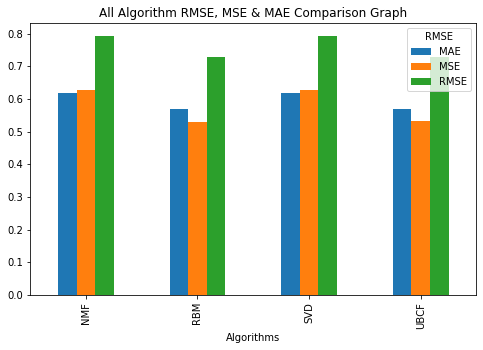

In [53]:
#plotting RMSE and other metrics graph between all algorithms
df = pd.DataFrame([['RBM','RMSE',rmse[0]],['RBM','MSE',mse[0]],['RBM','MAE',mae[0]],
                   ['SVD','RMSE',rmse[1]],['SVD','MSE',mse[1]],['SVD','MAE',mae[1]],
                   ['NMF','RMSE',rmse[2]],['NMF','MSE',mse[2]],['NMF','MAE',mae[2]],
                   ['UBCF','RMSE',rmse[3]],['UBCF','MSE',mse[3]],['UBCF','MAE',mae[3]],
                  ],columns=['Algorithms','RMSE','Value'])
df.pivot("Algorithms", "RMSE", "Value").plot(kind='bar')
plt.rcParams["figure.figsize"]= [8,5]
plt.title("All Algorithm RMSE, MSE & MAE Comparison Graph")
plt.show()

In [54]:
#showing all algorithms performance in tabular format
columns = ["Algorithm Name","RMSE","MSE","MAE"]
values = []
algorithm_names = ["RBM", "SVD", "NMF", "UBCF"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],rmse[i],mse[i],mae[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,RMSE,MSE,MAE
0,RBM,0.728273,0.530382,0.569966
1,SVD,0.792240,0.627645,0.618772
2,NMF,0.792240,0.627645,0.618772
3,UBCF,0.728722,0.531035,0.570123


In [58]:
#now predict student GPA on test data
testData = pd.read_csv("Dataset/testData.csv") #reading test data
testData.fillna(0, inplace = True) #remove missing values
testData = testData.values
X = testData[:,0:testData.shape[1]] #extract training features
X = scaler.transform(X) #normalize training features
predict = rbm.predict(X) #now predict GPA using RBM
for i in range(len(testData)):
    print("Test Data : "+str(testData[i])+" ===> Predicted GPA : "+str(round(predict[i],3)))

Test Data : [  0.   550.64 580.24 491.14 783.7  550.9  552.39 684.41 460.96 503.63] ===> Predicted GPA : 3.076
Test Data : [  0.   685.79 611.5  626.39 542.   592.79 569.53 557.9  643.56 682.51] ===> Predicted GPA : 3.069
Test Data : [  0.   565.86 441.07 570.49 576.49 535.77 669.2  489.62 559.61 496.39] ===> Predicted GPA : 2.957
Test Data : [  0.   453.27 469.32 561.4  742.17 645.09 549.01 490.21 449.34 433.95] ===> Predicted GPA : 2.854
Test Data : [  0.   414.7  456.95 705.58 584.57 434.27 701.44 502.96 384.38 420.67] ===> Predicted GPA : 3.057
Test Data : [  1.   524.79 446.67 491.14 609.32 525.37 458.69 513.28 634.6  547.67] ===> Predicted GPA : 2.283
Test Data : [  1.   503.92 610.91 757.76 749.37 555.47 676.8  680.41 611.36 462.23] ===> Predicted GPA : 2.912
Test Data : [  1.   505.06 534.23 547.21 627.14 460.69 516.77 499.01 449.18 529.77] ===> Predicted GPA : 2.438
Test Data : [  1.   505.69 535.79 514.76 559.64 468.57 478.51 514.71 534.14 460.17] ===> Predicted GPA : 2.304
T